In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_table("[PATH]/NewsAggregatorDataset/newsCorpora.csv", index_col=0,
                   names = ("ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"))
df_1 = df[(df["PUBLISHER"]=="Reuters")|(df["PUBLISHER"]=="Huffington Post")|(df["PUBLISHER"]=="Businessweek")|
            (df["PUBLISHER"]=="Contactmusic.com")|(df["PUBLISHER"]=="Daily Mail")].loc[:, ["CATEGORY", "TITLE"]]#情報源をキーとした抽出
df_1 = df_1[~df_1["TITLE"].str.contains("http")]
df_Train, df_Test = train_test_split(df_1, test_size=0.2)
df_Test, df_Val = train_test_split(df_Test, test_size=0.5)

df_Train.to_csv("[PATH]/train.txt", sep='\t', index=False)
df_Test.to_csv("[PATH]/test.txt", sep='\t', index=False)
df_Val.to_csv("[PATH]/valid.txt", sep='\t', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '[PATH]/NewsAggregatorDataset/newsCorpora.csv'

In [26]:
data = pd.read_csv("newsCorpora.csv", encoding='utf-8', sep='\t')

In [27]:
data.head()

,1,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
0,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
1,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
2,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
3,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
4,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212


In [28]:
import pandas as pd

# ファイル読み込み
file = "newsCorpora.csv"
data = pd.read_csv(file, encoding='utf-8', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])
data = data.replace('"', "'")
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [29]:
publishers = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']
data = data.loc[data['PUBLISHER'].isin(publishers), ['TITLE', 'CATEGORY']].reset_index(drop=True)
data.head()

,TITLE,CATEGORY
0,Europe reaches crunch point on banking union,b
1,ECB FOCUS-Stronger euro drowns out ECB's messa...,b
2,"Euro Anxieties Wane as Bunds Top Treasuries, S...",b
3,Noyer Says Strong Euro Creates Unwarranted Eco...,b
4,REFILE-Bad loan triggers key feature in ECB ba...,b


In [32]:
#学習用、検証用、評価用に分割する
from sklearn.model_selection import train_test_split

train, valid_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=64, stratify=data['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=64, stratify=valid_test['CATEGORY'])

# データの保存
train.to_csv('./Data/train.txt', sep='\t', index=False)
valid.to_csv('./Data/valid.txt', sep='\t', index=False)
test.to_csv('./Data/test.txt', sep='\t', index=False)

# データ数の確認
print('学習データ')
print(train['CATEGORY'].value_counts())
print('検証データ')
print(valid['CATEGORY'].value_counts())
print('評価データ')
print(test['CATEGORY'].value_counts())

学習データ
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
検証データ
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
評価データ
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


In [33]:
import re
from nltk import stem

# データの結合
df = pd.concat([train, valid, test], axis=0).reset_index(drop=True)

def preprocessing(text):
    # 記号の削除
    text_clean = re.sub(r'[\"\'.,:;\(\)#\|\*\+\!\?#$%&/\]\[\{\}]', '', text)
    # ' - 'みたいなつなぎ文字を削除
    text_clean = re.sub('\s-\s', ' ', text_clean)
    # 数字の正規化(全部0にする)
    text_clean = re.sub('[0-9]+', '0', text_clean)
    # 小文字化
    text_clean = text_clean.lower()
    # ステミングで語幹だけ取り出す
    stemmer = stem.PorterStemmer()
    res = [stemmer.stem(x) for x in text_clean.split()]
    return ' '.join(res)

df['TITLE'] = df['TITLE'].apply(preprocessing)
df.head()

,TITLE,CATEGORY
0,justin bieber under investig for attempt robbe...,e
1,exxon report claim world highli unlik to limit...,b
2,jack white record releas singl in hour for rec...,e
3,presid barack obama releas proclam declar june...,t
4,samsung share steadi after chairman heart attack,m


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1, 2)) # 1-gram, 2-gramでTfidfを計算
X = vectorizer.fit_transform(df['TITLE']).toarray()
X_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
train_X = X_df.iloc[:len(train), :] # 訓練データの特徴量
valid_X = X_df.iloc[len(train):len(train)+ len(valid), :] # 評価データの特徴量
test_X = X_df.iloc[len(train)+ len(valid):, :] # テストデータの特徴量
train_X.to_csv('./Data/train.feature.txt', sep='\t', index=False)
valid_X.to_csv('./Data/valid.feature.txt', sep='\t', index=False)
test_X.to_csv('./Data/test.feature.txt', sep='\t', index=False)
print(train_X.shape)

# output
# (10672, 3132)

(10672, 3132)


In [38]:
train['CATEGORY']

13326    e
2369     b
4382     e
8244     t
6607     m
        ..
4824     e
12745    m
5942     b
3362     b
11268    b
Name: CATEGORY, Length: 10672, dtype: object

In [42]:
from sklearn.linear_model import LogisticRegression

# モデルの学習
lg = LogisticRegression(random_state=64, max_iter=10000)
lg.fit(train_X, train['CATEGORY'])

LogisticRegression(max_iter=10000, random_state=64)

In [43]:
import numpy as np

def score(lg, X):
    pred = lg.predict(X)
    proba = np.max(lg.predict_proba(X), axis=1)
    return pred, proba

train_pred, train_proba = score(lg, train_X)
test_pred, test_proba = score(lg, test_X)

print(train_pred)
print(train_proba)

['e' 'b' 'e' ... 'b' 'b' 'b']
[0.86630593 0.44273915 0.77701407 ... 0.94631966 0.58440346 0.82756511]


In [44]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train['CATEGORY'], train_pred)

test_accuracy = accuracy_score(test['CATEGORY'], test_pred)
print('正解率（学習データ）：{}'.format(train_accuracy))

print('正解率（テストデータ）：{}'.format(test_accuracy))

正解率（学習データ）：0.931784107946027
正解率（テストデータ）：0.9025487256371814


<AxesSubplot:ylabel='TARGET'>

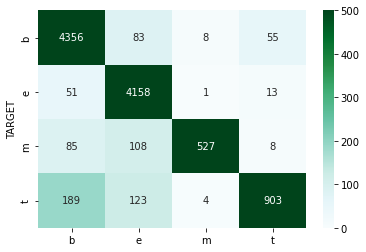

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_cm = confusion_matrix(train['CATEGORY'], train_pred)
cm = pd.DataFrame(train_cm, columns=['b', 'e', 'm', 't'])
cm['TARGET'] = ['b', 'e', 'm', 't']
cm = cm.set_index('TARGET')
sns.heatmap(cm, vmin=0, vmax=500, annot=True, fmt='d', cmap='BuGn')

In [46]:
from sklearn.metrics import classification_report

print(classification_report(test['CATEGORY'], test_pred, labels=['b', 'e', 'm', 't']))


              precision    recall  f1-score   support

           b       0.91      0.95      0.93       563
           e       0.91      0.98      0.94       528
           m       0.93      0.55      0.69        91
           t       0.86      0.66      0.75       152

    accuracy                           0.90      1334
   macro avg       0.90      0.79      0.83      1334
weighted avg       0.90      0.90      0.90      1334



In [47]:
import numpy as np
 
features = train_X.columns.values
for c, coef in zip(lg.classes_, lg.coef_):
  top_10 = pd.DataFrame(features[np.argsort(-coef)[:10]], columns=[f"重みの高い特徴量トップ10（クラス名：{c}）"], index=[i for i in range(1, 11)])
  worst_10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=[f"重みの低い特徴量トップ10（クラス名：{c}）"], index=[i for i in range(1, 11)])
  print( top_10, "\n"),
  print(worst_10, "\n", "-"*70)

   重みの高い特徴量トップ10（クラス名：b）
1                   bank
2                    fed
3                  china
4                    ecb
5                 ukrain
6                 profit
7                   euro
8                  updat
9                    oil
10                 stock 

   重みの低い特徴量トップ10（クラス名：b）
1                    and
2                  studi
3                  ebola
4                  aereo
5                   star
6              microsoft
7                    the
8                    her
9                     tv
10                  appl 
 ----------------------------------------------------------------------
   重みの高い特徴量トップ10（クラス名：e）
1             kardashian
2                   film
3                   chri
4                   movi
5                    wed
6                   star
7                    her
8                    kim
9                    fan
10               trailer 

   重みの低い特徴量トップ10（クラス名：e）
1                  updat
2                  googl
3                     u

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#モデル構築、学習（関数）
def LR_model_fit(x_data, y_data, c):
  model = LogisticRegression(C=c)
  model.fit(x_data, y_data) 
  return model

#学習済みモデルを用いて予測する（関数）
def LR_pred(x_data, y_data, model):
  Y_pred_data = model.predict(x_data)
  accuracy = accuracy_score(Y_pred_data, y_data)
  return accuracy

train_acc = []
valid_acc = []
test_acc = []

#正則化パラメータ
c_list = np.linspace(0.001, 0.1, 5)

for c in c_list:
  model = LR_model_fit(x_train, y_train, c)
  pre_train = LR_pred(x_train, y_train, model)
  pre_valid = LR_pred(x_valid, y_valid, model)
  pre_test = LR_pred(x_test, y_test, model)

  train_acc.append(pre_train)
  valid_acc.append(pre_valid)
  test_acc.append(pre_test)

  print(f"【正則化パラメータ：{c}】\n")
  print(f"train_accuracy：{pre_train}")
  print(f"valid_accuracy：{pre_valid}")
  print(f"test_accuracy：{pre_test}\n")

#可視化
plt.plot(c_list, train_acc, label="train", marker="o")
plt.plot(c_list, valid_acc, label="valid", marker="o")
plt.plot(c_list, test_acc, label="test", marker="o")

plt.legend()
plt.grid(True)
plt.xlabel("Regularization")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'x_train' is not defined